In [4]:
import pandas as pd

In [24]:
df_train = pd.read_csv('../data/income_forecast/train.csv')
df_test = pd.read_csv('../data/income_forecast/test.csv')

In [27]:
df_train.tail()

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
11895,9225,23,Private,132652,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,United-States,0
11896,13123,31,Private,132652,HS-grad,9,Divorced,Other-service,Unmarried,Black,Female,United-States,0
11897,9845,21,Private,132652,HS-grad,9,Never-married,Other-service,Own-child,White,Male,United-States,0
11898,10799,29,Private,132652,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Male,United-States,0
11899,2732,17,Private,132652,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,United-States,1


In [9]:
df.describe()

,index,age,fnlwgt,education-num,Y
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,8474.659076,27.958319,130706.714118,10.384370,0.256134
std,4927.916370,9.563625,14218.695201,2.209696,0.436515
min,0.000000,17.000000,24694.000000,3.000000,0.000000
25%,4181.750000,20.000000,132652.000000,9.000000,0.000000
50%,8453.500000,24.000000,132652.000000,10.000000,0.000000
75%,12761.250000,34.000000,132652.000000,13.000000,1.000000
max,16997.000000,64.000000,132652.000000,16.000000,1.000000


In [22]:
for column in df_train.columns:
  print(column)
  print(df_train[column].value_counts())
  print()

index
322      1
1860     1
9248     1
11055    1
11996    1
        ..
11815    1
6426     1
4007     1
10669    1
2732     1
Name: index, Length: 11900, dtype: int64

age
23    1758
19    1265
17    1182
31     883
36     757
24     682
50     631
21     585
37     446
28     347
33     320
20     299
18     270
30     221
22     221
32     212
25     175
29     165
27     146
43     146
38     137
26     129
35     129
41     114
39     113
42      99
47      96
45      88
34      85
55      38
44      32
46      32
62      18
58      16
51      11
52      11
60       9
49       8
64       8
40       7
54       6
57       1
63       1
48       1
Name: age, dtype: int64

workclass
Private             9237
Self-emp-not-inc     854
Local-gov            583
?                    527
State-gov            298
Self-emp-inc         237
Federal-gov          164
Name: workclass, dtype: int64

fnlwgt
132652    11681
24694       169
34572        50
Name: fnlwgt, dtype: int64

education
HS-grad  

In [25]:
for column in df_test.columns:
  print(column)
  print(df_test[column].value_counts())
  print()

index
3873     1
14574    1
133      1
8022     1
15153    1
        ..
13376    1
14459    1
12584    1
7337     1
4214     1
Name: index, Length: 5100, dtype: int64

age
23    814
19    518
17    467
31    393
36    357
24    299
21    275
50    265
37    182
28    138
33    135
20    135
18    107
32     92
22     90
30     89
25     73
35     72
29     63
27     61
43     60
41     52
26     52
38     49
42     48
34     40
47     38
39     36
45     23
55     19
44     14
46     12
58      9
40      5
60      4
64      4
51      3
49      3
62      2
52      1
54      1
Name: age, dtype: int64

workclass
Private             4002
Self-emp-not-inc     329
Local-gov            254
?                    213
State-gov            128
Self-emp-inc          99
Federal-gov           75
Name: workclass, dtype: int64

fnlwgt
132652    5024
24694       58
34572       18
Name: fnlwgt, dtype: int64

education
HS-grad         1647
Some-college    1211
Bachelors        960
Masters          342
Ass

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC

import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate

from sklearn.preprocessing import OneHotEncoder

import datetime
tz = datetime.timezone(datetime.timedelta(hours=9))


In [55]:
df_train_dum = pd.get_dummies(df_train)
df_train_dum.head()

,index,age,fnlwgt,education-num,Y,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_White,sex_Female,sex_Male,native-country_Mexico,native-country_Philippines,native-country_United-States
0,322,21,132652,10,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
1,11968,29,132652,9,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
2,10868,19,132652,13,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,3394,17,132652,9,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
4,15993,47,132652,10,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [85]:
# データの分割
train, test = train_test_split(df_train_dum, test_size=0.1, shuffle=True, random_state=123, stratify=df_train['Y'])
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


In [212]:
categories = [
  'age',          
  # 'fnlwgt', 
  'education-num',
  # 'workclass_?',
  'workclass_Federal-gov',
  'workclass_Local-gov',
  'workclass_Private',
  'workclass_Self-emp-inc',
  'workclass_Self-emp-not-inc',
  'workclass_State-gov',
  'education_10th',
  'education_11th',
  'education_12th',
  # 'education_1st-4th',
  # 'education_5th-6th',
  'education_7th-8th',
  'education_9th',
  'education_Assoc-acdm', 
  'education_Assoc-voc',
  'education_Bachelors',
  'education_HS-grad',
  'education_Masters',
  'education_Prof-school',
  'education_Some-college',
  'marital-status_Divorced', 
  'marital-status_Married-civ-spouse',
  'marital-status_Never-married',
  'marital-status_Separated',
  'marital-status_Widowed', 
  # 'occupation_?',
  'occupation_Adm-clerical',
  'occupation_Craft-repair',
  'occupation_Exec-managerial',
  'occupation_Farming-fishing',
  'occupation_Handlers-cleaners', 
  'occupation_Machine-op-inspct',
  'occupation_Other-service',
  'occupation_Prof-specialty',
  'occupation_Protective-serv',
  'occupation_Sales',
  'occupation_Tech-support',
  'occupation_Transport-moving',
  'relationship_Husband',
  'relationship_Not-in-family',
  'relationship_Other-relative',
  'relationship_Own-child',
  'relationship_Unmarried',
  'relationship_Wife',
  'race_Asian-Pac-Islander',
  'race_Black',
  'race_White',
  'sex_Female',
  'sex_Male', 
  'native-country_Mexico',
  'native-country_Philippines',
  'native-country_United-States'
]
target = ['Y']

In [213]:
# オーバーサンプリング
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

y = train['Y']

ros = RandomOverSampler(random_state=42)
print('Original dataset shape %s' % Counter(y))

X_ros, y_ros = ros.fit_resample(train, y)
print('Resampled dataset shape %s' % Counter(y_ros))

Original dataset shape Counter({0: 7967, 1: 2743})
Resampled dataset shape Counter({0: 7967, 1: 7967})


In [214]:
X_ros

,index,age,fnlwgt,education-num,Y,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_White,sex_Female,sex_Male,native-country_Mexico,native-country_Philippines,native-country_United-States
0,6225,23,132652,9,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,9951,18,132652,9,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
2,4498,23,132652,9,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,2000,28,132652,9,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,12458,19,132652,11,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15929,3409,36,132652,13,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
15930,7706,23,132652,14,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
15931,9864,58,132652,14,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
15932,8351,41,132652,10,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [225]:
import lightgbm as lgbm

print("Fitting LightGBM model ...")

# 学習開始時刻を記録
start_time = datetime.datetime.now(tz)
print('学習開始')
print(start_time)


lgbm_model = lgbm.LGBMClassifier()
# lgbm_model.fit(train[categories], train[target])
lgbm_model.fit(X_ros[categories], y_ros)


print("Done.")# 学習終了時刻を記録
end_time = datetime.datetime.now(tz)
print('学習終了')
print(end_time)

# 学習にかかった時間を計算
print('学習にかかった時間')
print(end_time - start_time)
print("Done.")

Fitting LightGBM model ...
学習開始
2023-02-04 04:13:53.196697+09:00
Done.
学習終了
2023-02-04 04:13:53.327394+09:00
学習にかかった時間
0:00:00.130697
Done.


In [224]:
#traning dataのaccuracy
pred_train_lgbm = lgbm_model.predict(train[categories])
accuracy_train_lgbm = accuracy_score(train[target], pred_train_lgbm)
print('traning data accuracy： %.6f' % accuracy_train_lgbm)

traning data accuracy： 0.830345


In [217]:
#test dataのaccuracy
pred_test_lgbm = lgbm_model.predict(test[categories])
accuracy_test_lgbm = accuracy_score(test[target], pred_test_lgbm)
print('traning data accuracy： %.6f' % accuracy_test_lgbm)

traning data accuracy： 0.834454


[[791 103]
 [ 94 202]]


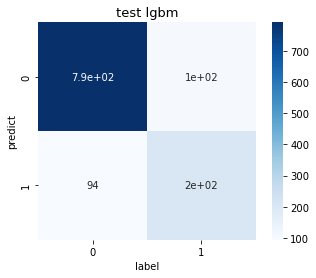

In [209]:
cm_test_lgbm = confusion_matrix(pred_test_lgbm, test[target])
sns.heatmap(cm_test_lgbm, square=True, cbar=True, annot=True, cmap='Blues')
plt.title("test lgbm", fontsize=13)
plt.xlabel('label')
plt.ylabel('predict')

plt.show
print(cm_test_lgbm)

In [188]:
lgbm_model.feature_importances_

array([884, 326,  37,  64, 118,  36,  48,  30,  12,   4,   0,   2,   7,
        36,  41,  73,  44,  20,  18,  81,  40,  50,  40,   9,  15,  70,
        50, 113,  23,  40,  32,  27, 121,  24,  58,  41,  16,  31,  66,
         5,  40,  24,  19,  21,  33,  33,  58,  20], dtype=int32)

In [198]:
fi = pd.Series(lgbm_model.feature_importances_, index=lgbm_model.feature_name_)

In [199]:
fi

age                                  892
education-num                        329
workclass_Federal-gov                 32
workclass_Local-gov                   57
workclass_Private                    112
workclass_Self-emp-inc                39
workclass_Self-emp-not-inc            45
workclass_State-gov                   27
education_10th                        14
education_11th                         3
education_12th                         9
education_1st-4th                      0
education_5th-6th                      0
education_7th-8th                      4
education_9th                          1
education_Assoc-acdm                  31
education_Assoc-voc                   45
education_Bachelors                   65
education_HS-grad                     53
education_Masters                     26
education_Prof-school                 21
education_Some-college                66
marital-status_Divorced               46
marital-status_Married-civ-spouse     59
marital-status_N

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

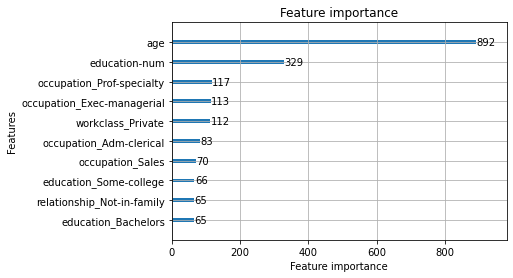

In [200]:
lgbm.plot_importance(lgbm_model, max_num_features=10)

In [ ]:
# ガチテストデータ
df_test_dum = pd.get_dummies(df_test)
pub_test = pd.DataFrame(df_test['index'])

In [218]:
import lightgbm as lgbm

print("Fitting LightGBM model ...")

# 学習開始時刻を記録
start_time = datetime.datetime.now(tz)
print('学習開始')
print(start_time)


lgbm_model = lgbm.LGBMClassifier()
lgbm_model.fit(df_train_dum[categories], df_train_dum[target])


print("Done.")# 学習終了時刻を記録
end_time = datetime.datetime.now(tz)
print('学習終了')
print(end_time)

# 学習にかかった時間を計算
print('学習にかかった時間')
print(end_time - start_time)
print("Done.")

Fitting LightGBM model ...
学習開始
2023-02-04 03:01:40.512544+09:00
Done.
学習終了
2023-02-04 03:01:40.631427+09:00
学習にかかった時間
0:00:00.118883
Done.


/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [220]:

pred_sub_lgbm = lgbm_model.predict(df_test_dum[categories])

pub_test['pred'] = pred_sub_lgbm

In [221]:
save_time = datetime.datetime.now(tz).strftime('%Y-%m-%d-%H:%M')
path = '../data/income_forecast/submit/'
pub_test.to_csv(path+save_time+'.csv', header=False, index=False)